In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


## Importación del Dataset

In [2]:
path_1='/kaggle/input/titanic-machine-learning-from-disaster/train.csv'
path_2='/kaggle/input/titanic-machine-learning-from-disaster/test.csv'

In [3]:
train1=pd.read_csv(path_1)
test1=pd.read_csv(path_2)

## Descripción del dataset 

In [4]:
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
## para eliminar las columnas irrelevantes 
trainfixed = train1.drop(['Name', 'Ticket', 'PassengerId', 'Cabin','Survived'], axis = 1)
trainfixed.columns 

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

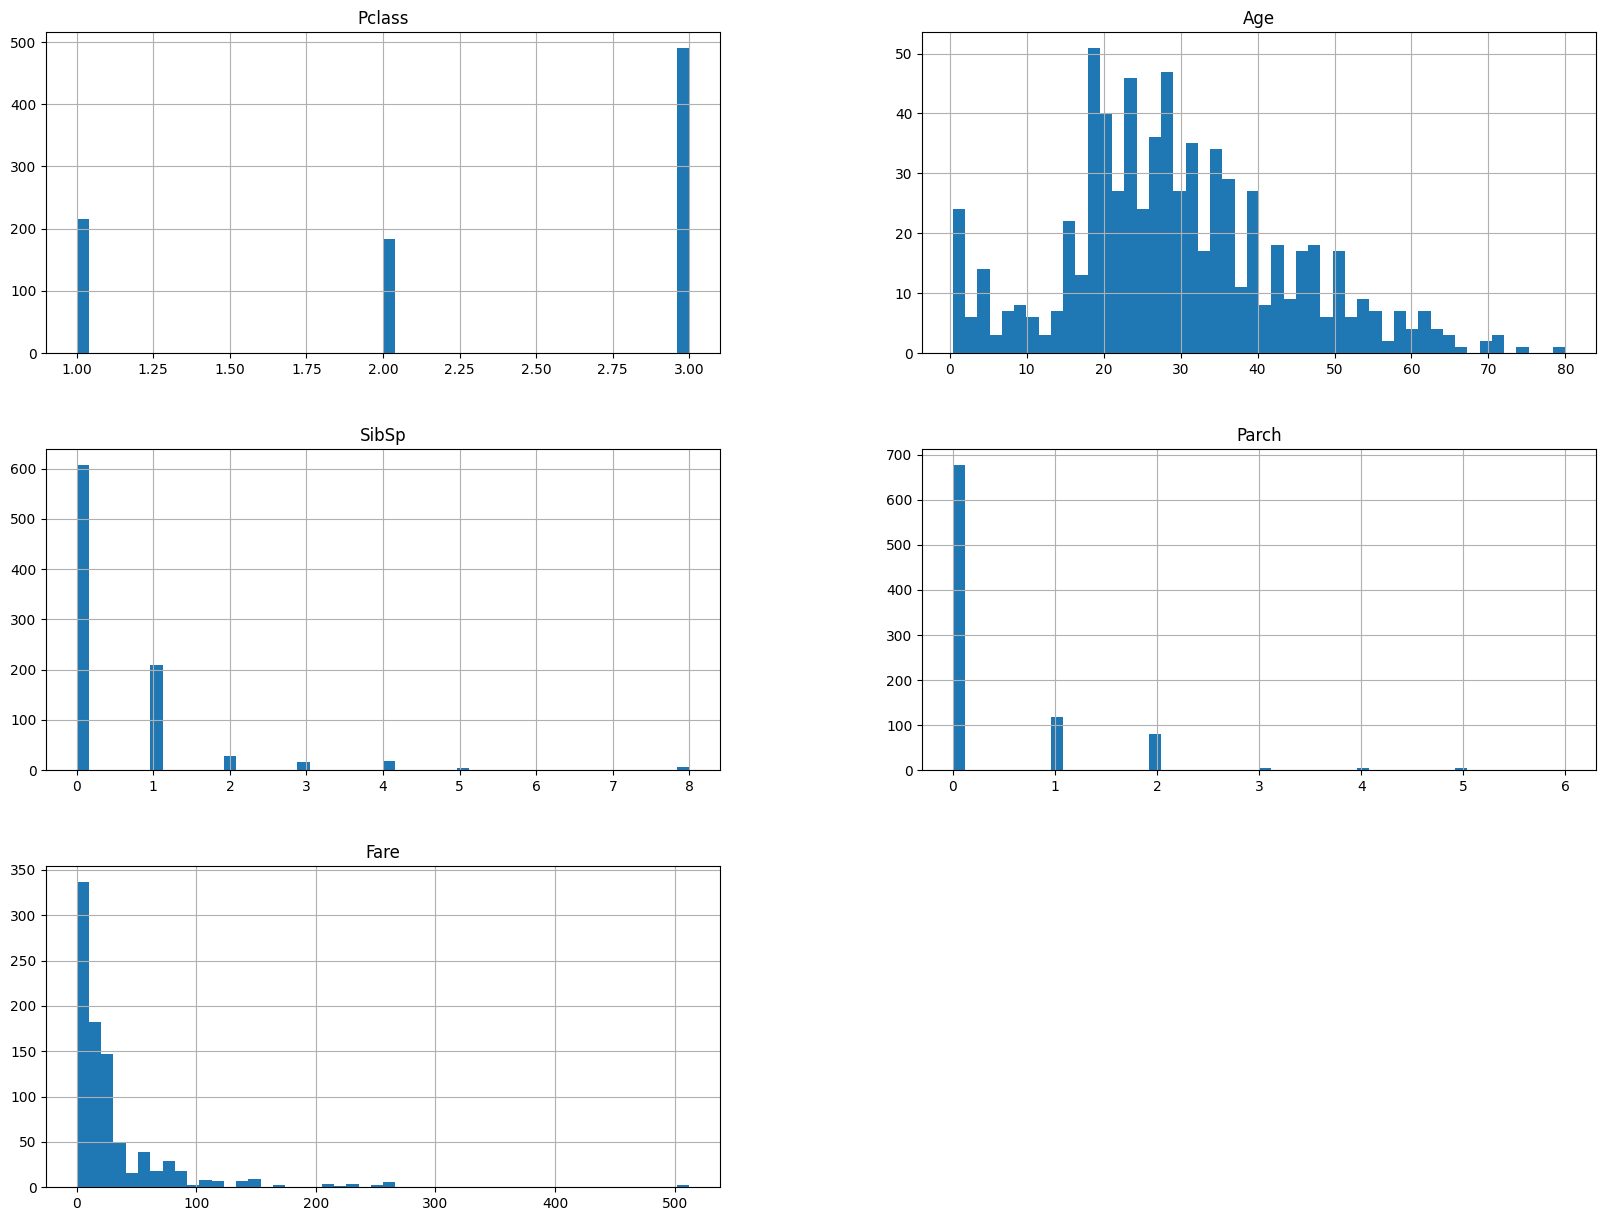

In [8]:
import matplotlib.pyplot as plt
trainfixed.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

encoder_ = OrdinalEncoder()
lista = ["Sex", "Embarked"]
trainfixed[lista]= encoder_.fit_transform(trainfixed[lista])
imputer_ = SimpleImputer(strategy='median')
trainfixed[['Age','Embarked']] = imputer_.fit_transform(trainfixed[['Age','Embarked']])
trainfixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 48.9 KB


## Reducción de dimensión con PCA

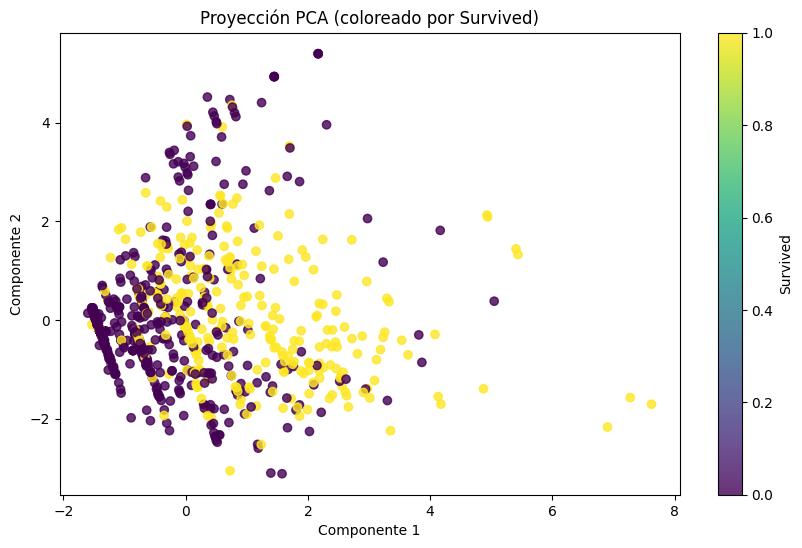

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

ytrain = train1['Survived']  
scaler = StandardScaler()
Xz = scaler.fit_transform(trainfixed.select_dtypes(include=['number']))  # asegura solo numéricas
Z = PCA(n_components=2).fit_transform(Xz)  # 2D para graficar

plt.figure(figsize=(10,6))
scatter = plt.scatter(Z[:,0], Z[:,1], c=ytrain, alpha=0.8)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Proyección PCA (coloreado por Survived)')
cbar = plt.colorbar(scatter)
cbar.set_label('Survived')
plt.show()


## Con RAPIDS 

In [11]:
from cuml.manifold import UMAP
import time

umap = UMAP(
    n_neighbors=500,     # más pequeño => preserva estructura local
    min_dist=0.2,       # menor => clusters más compactos
    n_components=2,     # proyección 2D
#    metric="euclidean", # métrica por defecto
#    init="spectral",    # inicialización estable
#    random_state=42
)
scaler2 = StandardScaler()
z = umap.fit_transform(scaler2.fit_transform(trainfixed))
z = np.asarray(z)
z

[2025-10-25 22:46:38.798] [CUML] [info] Building knn graph using brute force


array([[ 0.07552147, -2.3932743 ],
       [ 3.7544336 ,  2.4845161 ],
       [ 5.673401  , -0.09224701],
       ...,
       [ 3.7443285 , -0.5405693 ],
       [ 3.2096825 ,  3.64114   ],
       [ 2.5596657 ,  4.8825264 ]], dtype=float32)

In [12]:
ytrain1=np.asarray(ytrain)
ytrain1 

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

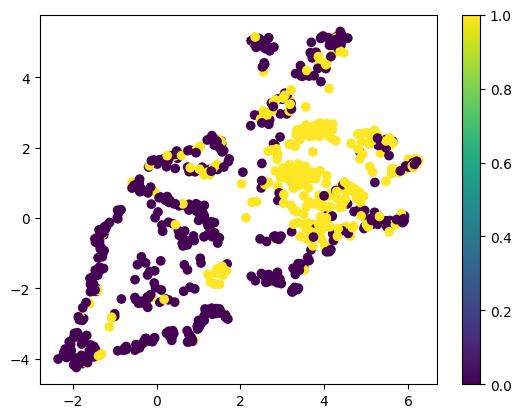

In [13]:
plt.scatter(z[:,0],z[:,1],c=ytrain1)
plt.colorbar()
plt.show()

## Comparación de Modelos

### Librerías

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import os, warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline

### Funciones para la matriz de confusión y las gráficas de curva ROC 

In [15]:
# ---- carpeta de resultados
os.makedirs("results", exist_ok=True)

# ---- guardar figuras (quita download si no usas Colab)
def save_fig(path_img, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(path_img, f"{fig_id}.{fig_extension}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print("Guardado:", path)


In [16]:
def plot_confusion_matrix_pct(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    """
    Matriz de confusión normalizada por filas (en %) con anotaciones.
    classes: array/list con nombres en el orden de las etiquetas (p.ej. ['No sobrevivió','Sobrevivió'])
    """
    if not title:
        title = 'Matriz de confusión'

    cm = confusion_matrix(y_true, y_pred, normalize="true") * 100.0
    classes = np.array(classes)[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots(figsize=(6.5, 5.5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
        title=title,
        ylabel='Etiqueta original',
        xlabel='Predicción'
    )

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = '.1f'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black"
            )
    fig.tight_layout()
    return ax


In [17]:
def roc_auc_binary(y_true, y_score, title='ROC binaria', path_img=None, fig_id=None):
    """
    y_score: probas de clase positiva (shape [n,]) o decisión continua para clase positiva.
    """
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:0.3f})', linewidth=2)
    plt.plot([0,1], [0,1], 'k--', linewidth=1)
    plt.xlim([0,1]); plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
    plt.title(title); plt.legend(loc='lower right')
    if path_img and fig_id:
        save_fig(path_img, fig_id)
    plt.show()
    return roc_auc


In [18]:
def cm_with_report(y_true, y_pred, class_names, model_title,
                   print_report=True, save_report_path=None):
    import seaborn as sns

    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=class_names, digits=3)

    # Matriz normalizada por filas (en %)
    cm = confusion_matrix(y_true, y_pred, normalize='true') * 100.0

    plt.figure(figsize=(6.5, 5.5), dpi=120)
    ax = sns.heatmap(cm, annot=True, fmt=".1f", cmap='Blues', cbar=True,
                     xticklabels=class_names, yticklabels=class_names,
                     annot_kws={'fontsize':9})
    ax.set_xlabel('Predicción'); ax.set_ylabel('Etiqueta original')
    ax.set_title(f'{model_title}  |  ACC = {acc*100:.1f} %', pad=10)
    ax.tick_params(axis='x', rotation=35); ax.tick_params(axis='y', rotation=0)
    plt.tight_layout()
    plt.show()

    if print_report:
        print(report)

    if save_report_path is not None:
        with open(save_report_path, 'w', encoding='utf-8') as f:
            f.write(report)

    return acc, report

### Entrenamiento y evaluación usando GridSearchCV

In [19]:
#Particion entrenamiento y evaluación
# Tamaño Xtrain 70%, Tamaño Xtest 30%
Xtrain, Xtest, Ytrain,ytest = train_test_split(trainfixed,ytrain,test_size=0.3, random_state=123)
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
416,2,0.0,34.0,1,1,32.5000,2.0
801,2,0.0,31.0,1,1,26.2500,2.0
512,1,1.0,36.0,0,0,26.2875,2.0
455,3,1.0,29.0,0,0,7.8958,0.0
757,2,1.0,18.0,0,0,11.5000,2.0


In [20]:
#se crean listas de steps (pipelines)
steps=[[('nor', MinMaxScaler()),
        ('cla', KNeighborsClassifier())], #Pipeline1
       [('nor',  MinMaxScaler()),
        ('cla', SGDClassifier())],#Pipeline2
        [('nor',MinMaxScaler()),
         ('cla', SVC())]#Pipeline3
 ]

parameters = [{
              'cla__n_neighbors': [1,3,5,7,9,11], #Pipeline1 - hyperparametros
              },
              {
              'cla__alpha': [1e-3,1e-2,1e-1,1,10,1e2,1e3],#Pipeline2 - hyperparametros
              },
              {
             'cla__C': [1,10,1e2,1e3,1e4],
             'cla__gamma': [1e-3, 1e-2, 1e-1,1, 10]    #Pipeline2 - hyperparametros
              }
             ]

label_models = ['MinMax_KNeighbors','MinMax_SGD', 'MinMax_SVCrbf']

models = []
filename = 'results/titanic_models'
for i in range(len(steps)): # recorrer modelos según lista pipeline
    print('modelo %d/%d' % (i+1,len(steps)))
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=-1,cv=5,
                                scoring='accuracy',refit= True,verbose=10)#gridsearch para modelo i
    grid_search.fit(Xtrain, Ytrain)
    #mejor modelo entrenado
    models += [grid_search] #guardar modelos
    joblib.dump(models,filename+".pkl")

modelo 1/3
Fitting 5 folds for each of 6 candidates, totalling 30 fits
modelo 2/3
Fitting 5 folds for each of 7 candidates, totalling 35 fits
modelo 3/3
Fitting 5 folds for each of 25 candidates, totalling 125 fits


## Validación Cruzada con los mejores modelos

In [21]:
ind = models[2].cv_results_['mean_test_score'].argmax()#encontrar rendimiento más alto sobre CV del gridsearch en test
models[i].cv_results_['mean_test_score'][i]

0.7817548387096774

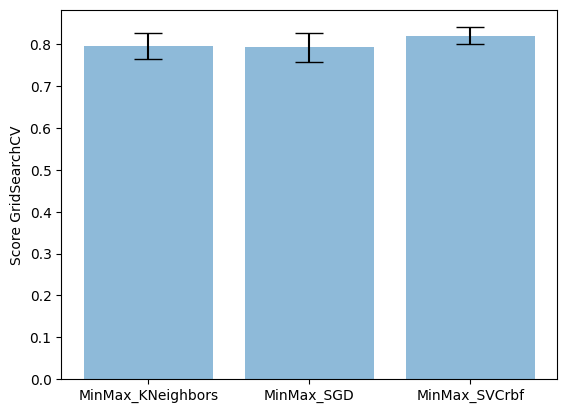

['MinMax_KNeighbors', 'MinMax_SGD', 'MinMax_SVCrbf']
[[0.795 0.793 0.82 ]
 [0.031 0.035 0.02 ]]


In [22]:
#recorrer modelos
bars_ = np.zeros((2,len(models)))#arreglo de barras para graficar mejores modelos en promedio con std
for i in range(len(models)):
  ind = models[i].cv_results_['mean_test_score'].argmax()#se determina el mejor score de clasificación
  bars_[0,i] = models[i].cv_results_['mean_test_score'][ind]#guardar score promedio del mejor modelo
  bars_[1,i] = models[i].cv_results_['std_test_score'][ind]#guardar std del mejor modelo

plt.bar(np.arange(len(models)), bars_[0], yerr=bars_[1], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Score GridSearchCV')
plt.xticks(np.arange(len(models)))
plt.gca().set_xticklabels(label_models)
plt.show()

print(label_models)
print(np.round(bars_,3))

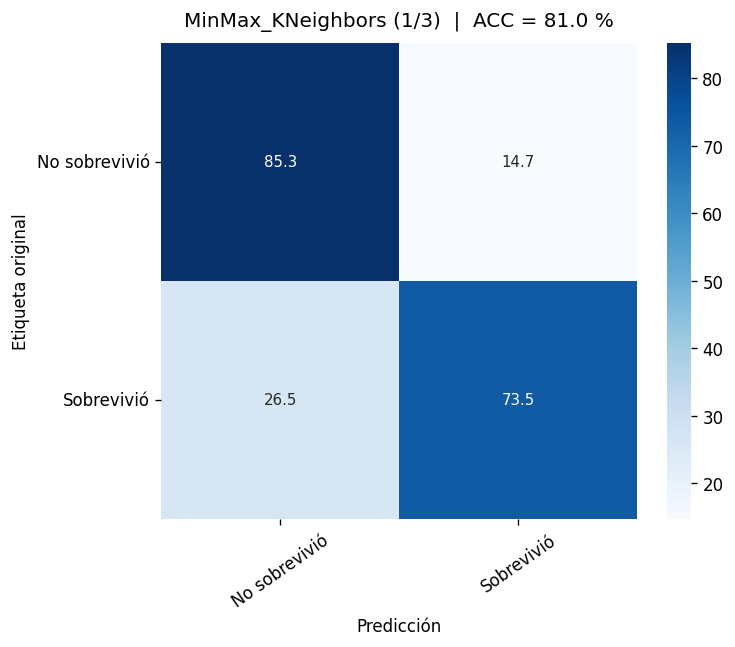

               precision    recall  f1-score   support

No sobrevivió      0.848     0.853     0.850       170
   Sobrevivió      0.742     0.735     0.738        98

     accuracy                          0.810       268
    macro avg      0.795     0.794     0.794       268
 weighted avg      0.809     0.810     0.809       268



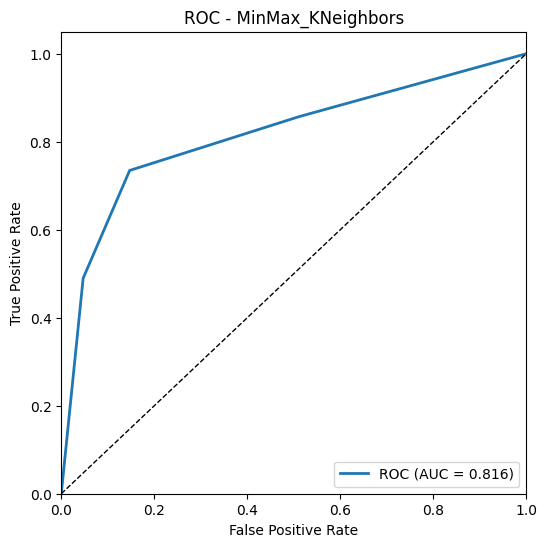

AUC = 0.816


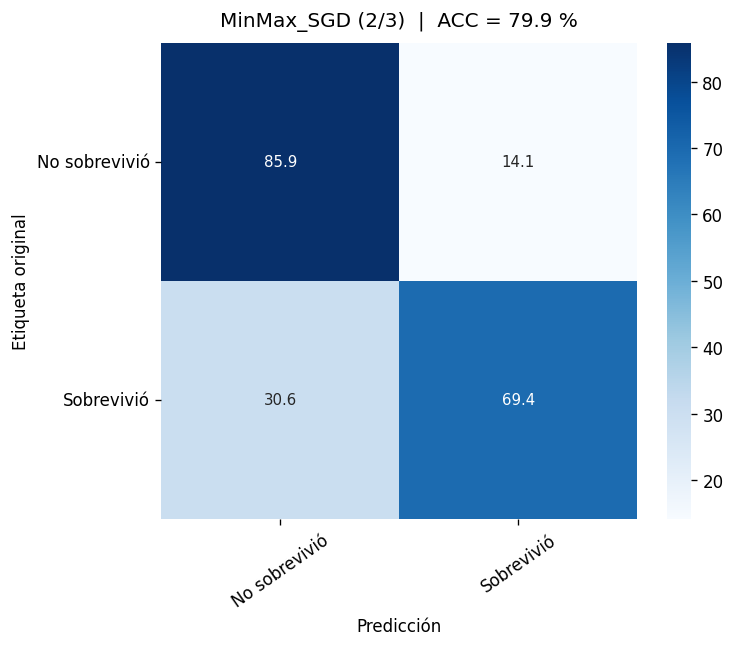

               precision    recall  f1-score   support

No sobrevivió      0.830     0.859     0.844       170
   Sobrevivió      0.739     0.694     0.716        98

     accuracy                          0.799       268
    macro avg      0.784     0.776     0.780       268
 weighted avg      0.796     0.799     0.797       268



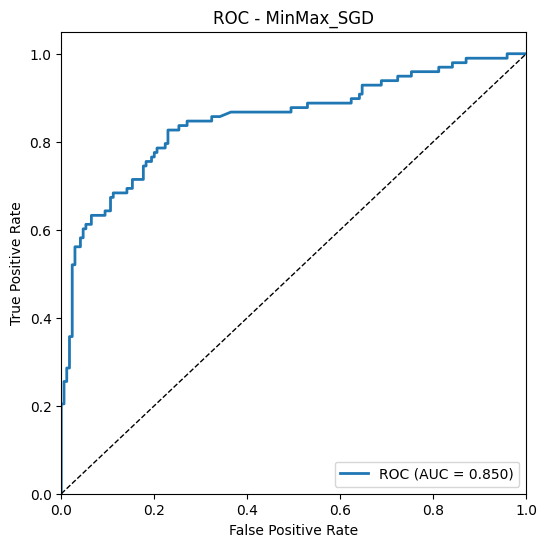

AUC = 0.850


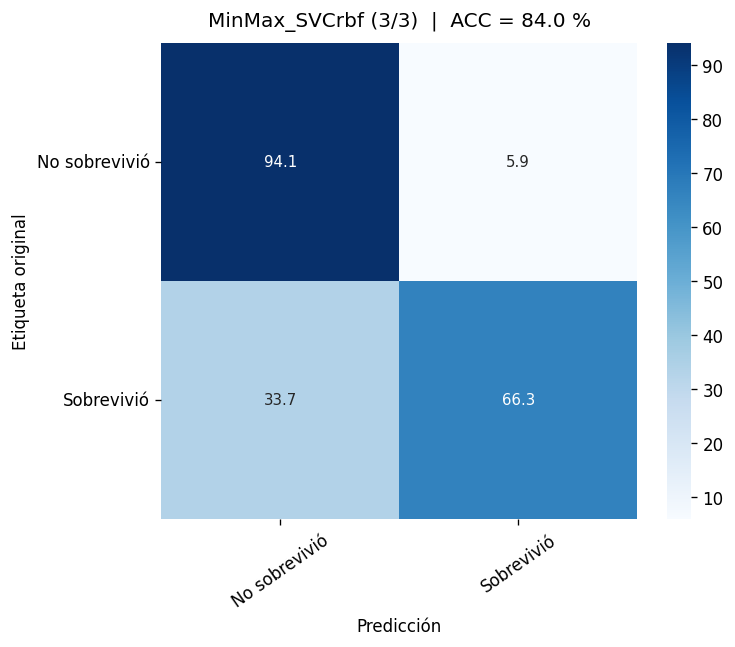

               precision    recall  f1-score   support

No sobrevivió      0.829     0.941     0.882       170
   Sobrevivió      0.867     0.663     0.751        98

     accuracy                          0.840       268
    macro avg      0.848     0.802     0.816       268
 weighted avg      0.843     0.840     0.834       268



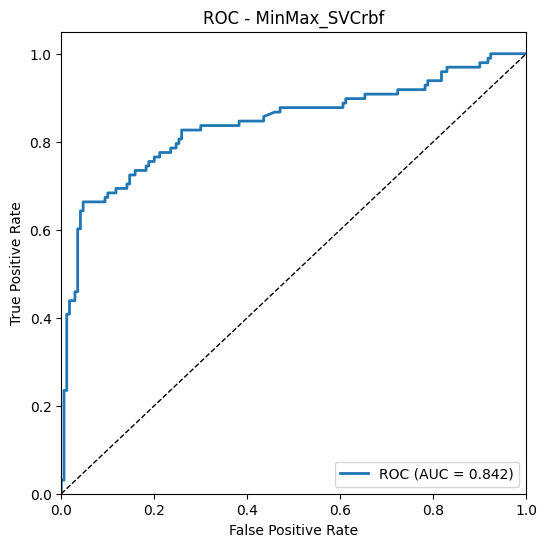

AUC = 0.842


In [23]:
class_names = ['No sobrevivió', 'Sobrevivió']

my_model_loaded = joblib.load('results/titanic_models.pkl')

for i, grid in enumerate(my_model_loaded):
    name = label_models[i] if i < len(label_models) else f'Modelo {i+1}'
    best_est = grid.best_estimator_

    # --- predicciones de clase (para matriz y métricas por clase)
    y_pred = best_est.predict(Xtest)

    # --- figura tipo "tu ejemplo" (heatmap + classification_report)
    cm_with_report(ytest, y_pred, class_names, model_title=f'{name} ({i+1}/{len(my_model_loaded)})')

    # --- ROC-AUC binaria (opcional)
    try:
        # preferimos probabilidad si existe:
        if hasattr(best_est, "predict_proba"):
            y_score = best_est.predict_proba(Xtest)[:, 1]  # proba de clase positiva (1 = sobrevivir)
        else:
            y_score = best_est.decision_function(Xtest)    # score continuo
        auc_val = roc_auc_binary(ytest, y_score, title=f'ROC - {name}')
        print(f'AUC = {auc_val:.3f}')
    except Exception as e:
        print(f'No se pudo calcular ROC para {name}: {e}')

### Entrenamiento y evaluación usando BayesSearchCV

In [24]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [25]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import joblib, os

filename = 'results/titanic_models_bayes.pkl'

models = []
for i in range(len(steps)):  # recorrer modelos según lista pipeline
    print('modelo %d/%d (%s)' % (i+1, len(steps), label_models[i]))

    # definir espacio de búsqueda bayesiano según el modelo
    if 'KNeighbors' in label_models[i]:
        search_space = {
            'cla__n_neighbors': Integer(1, 15)
        }

    elif 'SGD' in label_models[i]:
        search_space = {
            'cla__alpha': Real(1e-4, 1e3, prior='log-uniform')
        }

    elif 'SVC' in label_models[i]:
        search_space = {
            'cla__C': Real(1e-3, 1e4, prior='log-uniform'),
            'cla__gamma': Real(1e-4, 1e1, prior='log-uniform')
        }

    # reemplazo de GridSearchCV por BayesSearchCV
    bayes_search = BayesSearchCV(
        estimator=Pipeline(steps[i]),
        search_spaces=search_space,
        n_iter=25,              # número de iteraciones (experimentos)
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        random_state=123,
        verbose=2,
        refit=True
    )

    bayes_search.fit(Xtrain, Ytrain)
    models.append(bayes_search)  # guardar el modelo

# Guardar los modelos entrenados
joblib.dump(models, filename)
print("Modelos guardados en:", os.path.abspath(filename))


modelo 1/3 (MinMax_KNeighbors)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5; 1/6] START cla__n_neighbors=1..........................................
[CV 2/5; 1/6] END ...........cla__n_neighbors=1;, score=0.672 total time=   0.0s
[CV 5/5; 1/6] START cla__n_neighbors=1..........................................
[CV 5/5; 1/6] END ...........cla__n_neighbors=1;, score=0.742 total time=   0.0s
[CV 3/5; 2/6] START cla__n_neighbors=3..........................................
[CV 3/5; 2/6] END ...........cla__n_neighbors=3;, score=0.784 total time=   0.0s
[CV 1/5; 3/6] START cla__n_neighbors=5..........................................
[CV 1/5; 3/6] END ...........cla__n_neighbors=5;, score=0.784 total time=   0.0s
[CV 5/5; 3/6] START cla__n_neighbors=5..........................................
[CV 5/5; 3/6] END ...........cla__n_neighbors=5;, score=0.774 total time=   0.0s
[CV 4/5; 4/6] START cla__n_neighbors=7...

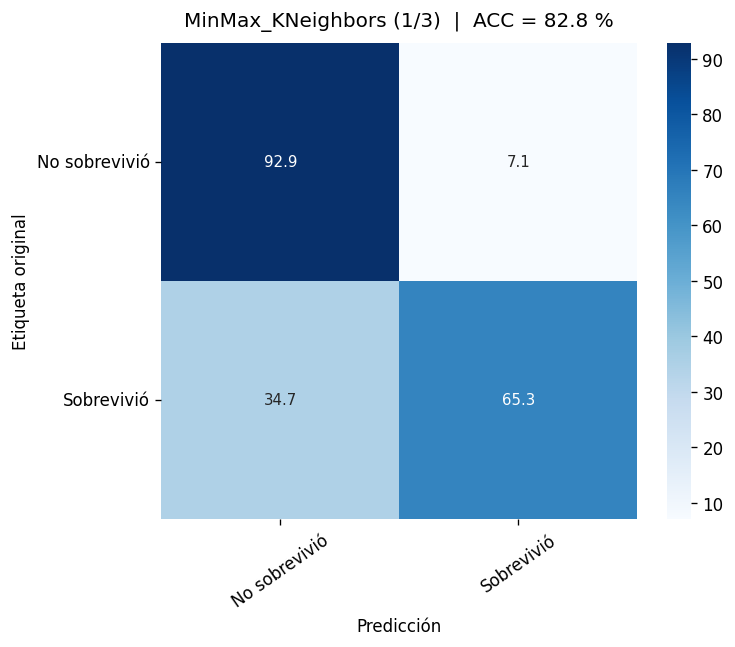

               precision    recall  f1-score   support

No sobrevivió      0.823     0.929     0.873       170
   Sobrevivió      0.842     0.653     0.736        98

     accuracy                          0.828       268
    macro avg      0.833     0.791     0.804       268
 weighted avg      0.830     0.828     0.823       268



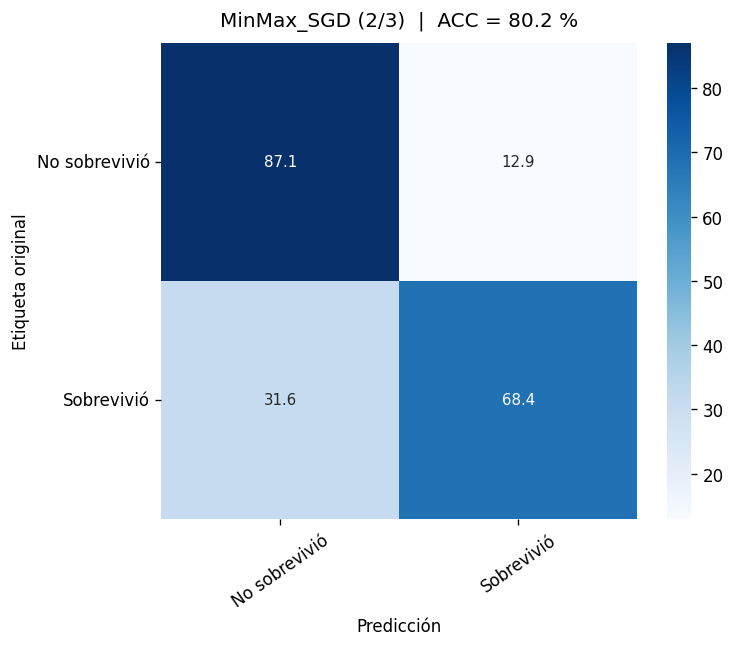

               precision    recall  f1-score   support

No sobrevivió      0.827     0.871     0.848       170
   Sobrevivió      0.753     0.684     0.717        98

     accuracy                          0.802       268
    macro avg      0.790     0.777     0.782       268
 weighted avg      0.800     0.802     0.800       268



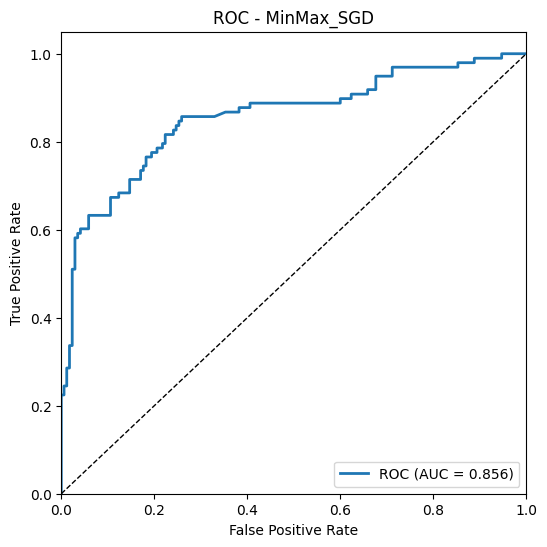

AUC = 0.856


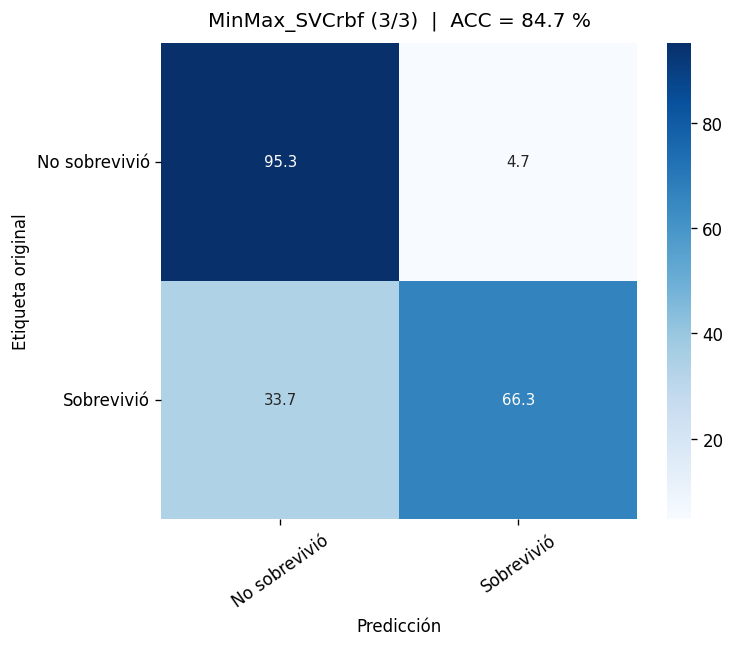

               precision    recall  f1-score   support

No sobrevivió      0.831     0.953     0.888       170
   Sobrevivió      0.890     0.663     0.760        98

     accuracy                          0.847       268
    macro avg      0.861     0.808     0.824       268
 weighted avg      0.853     0.847     0.841       268



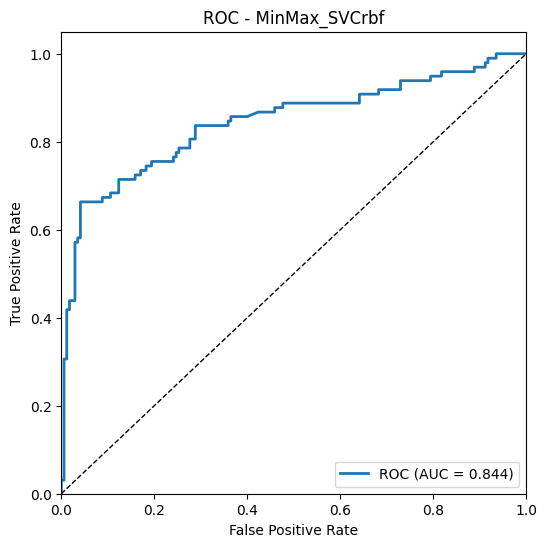

AUC = 0.844


In [26]:
my_model_loaded_bayes = joblib.load('results/titanic_models_bayes.pkl')

for i, grid in enumerate(my_model_loaded_bayes):
    name = label_models[i] if i < len(label_models) else f'Modelo {i+1}'
    best_est = grid.best_estimator_

    # --- predicciones de clase (para matriz y métricas por clase)
    y_pred = best_est.predict(Xtest)

    # --- figura tipo "tu ejemplo" (heatmap + classification_report)
    cm_with_report(ytest, y_pred, class_names, model_title=f'{name} ({i+1}/{len(my_model_loaded_bayes)})')

    # --- ROC-AUC binaria (opcional)
    try:
        # preferimos probabilidad si existe:
            if hasattr(best_est, "predict_proba"):
                y_score = best_est.predict_proba(Xtest)[:, 1]  # proba de clase positiva (1 = sobrevivir)
            else:
                y_score = best_est.decision_function(Xtest)    # score continuo
                auc_val = roc_auc_binary(ytest, y_score, title=f'ROC - {name}')
                print(f'AUC = {auc_val:.3f}')
    except Exception as e:
        print(f'No se pudo calcular ROC para {name}: {e}')

### Entrenamiento y evaluación con Optuna

In [27]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [28]:
# ---------- OPTUNA: entrenamiento y guardado ----------
!pip install -q optuna

import optuna, joblib, os
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

os.makedirs('results', exist_ok=True)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

label_models = ['MinMax_KNeighbors','MinMax_SGD','MinMax_SVCrbf']

def objective_factory(model_name):
    def objective(trial):
        if model_name == 'MinMax_KNeighbors':
            n_neighbors = trial.suggest_int('cla__n_neighbors', 1, 25)
            pipe = make_pipeline(MinMaxScaler(),
                                 KNeighborsClassifier(n_neighbors=n_neighbors))

        elif model_name == 'MinMax_SGD':
            alpha = trial.suggest_float('cla__alpha', 1e-4, 1e3, log=True)
            loss  = trial.suggest_categorical('cla__loss', ['log_loss','hinge','modified_huber'])
            pipe  = make_pipeline(MinMaxScaler(),
                                  SGDClassifier(alpha=alpha, loss=loss,
                                                max_iter=3000, tol=1e-3, random_state=123))

        elif model_name == 'MinMax_SVCrbf':
            C     = trial.suggest_float('cla__C', 1e-3, 1e4, log=True)
            gamma = trial.suggest_float('cla__gamma', 1e-4, 1e1, log=True)
            pipe  = make_pipeline(MinMaxScaler(),
                                  SVC(C=C, gamma=gamma, kernel='rbf',
                                      probability=True, random_state=123))
        else:
            raise ValueError("Modelo no soportado")

        scores = cross_val_score(pipe, Xtrain, Ytrain, cv=cv, scoring='accuracy', n_jobs=-1)
        return scores.mean()
    return objective

# Entrenar con Optuna y construir pipelines finales
records = []  # guardaremos dicts (serializan bien)
for name in label_models:
    print(f'🔎 Optimizando con Optuna: {name}')
    study = optuna.create_study(direction='maximize', study_name=name)
    study.optimize(objective_factory(name), n_trials=40, show_progress_bar=True)

    # Construir el pipeline final con los mejores parámetros y ajustar
    bp = study.best_params
    if name == 'MinMax_KNeighbors':
        pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=bp['cla__n_neighbors']))
    elif name == 'MinMax_SGD':
        pipe = make_pipeline(MinMaxScaler(),
                             SGDClassifier(alpha=bp['cla__alpha'], loss=bp['cla__loss'],
                                           max_iter=3000, tol=1e-3, random_state=123))
    elif name == 'MinMax_SVCrbf':
        pipe = make_pipeline(MinMaxScaler(),
                             SVC(C=bp['cla__C'], gamma=bp['cla__gamma'],
                                 kernel='rbf', probability=True, random_state=123))

    pipe.fit(Xtrain, Ytrain)

    # Guardar como diccionario (estimator + metadatos)
    records.append({
        "name": name,
        "estimator": pipe,
        "best_params": bp,
        "cv_score": study.best_value
    })

# Guardar en un .pkl
optuna_file = 'results/titanic_models_optuna.pkl'
joblib.dump(records, optuna_file)
print('✅ Modelos Optuna guardados en:', os.path.abspath(optuna_file))

# (Opcional) imprimir mejores parámetros
for rec in records:
    print(f"{rec['name']} | cv_score={rec['cv_score']:.4f} | params={rec['best_params']}")


[I 2025-10-25 22:47:40,665] A new study created in memory with name: MinMax_KNeighbors


🔎 Optimizando con Optuna: MinMax_KNeighbors


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-10-25 22:47:40,728] Trial 0 finished with value: 0.7930064516129033 and parameters: {'cla__n_neighbors': 8}. Best is trial 0 with value: 0.7930064516129033.
[I 2025-10-25 22:47:40,776] Trial 1 finished with value: 0.7801806451612904 and parameters: {'cla__n_neighbors': 6}. Best is trial 0 with value: 0.7930064516129033.
[I 2025-10-25 22:47:40,827] Trial 2 finished with value: 0.7930064516129033 and parameters: {'cla__n_neighbors': 8}. Best is trial 0 with value: 0.7930064516129033.
[I 2025-10-25 22:47:40,878] Trial 3 finished with value: 0.7882064516129033 and parameters: {'cla__n_neighbors': 20}. Best is trial 0 with value: 0.7930064516129033.
[I 2025-10-25 22:47:40,928] Trial 4 finished with value: 0.7865806451612903 and parameters: {'cla__n_neighbors': 10}. Best is trial 0 with value: 0.7930064516129033.
[I 2025-10-25 22:47:40,967] Trial 5 finished with value: 0.7882064516129033 and parameters: {'cla__n_neighbors': 22}. Best is trial 0 with value: 0.7930064516129033.
[I 2025

[I 2025-10-25 22:47:42,623] A new study created in memory with name: MinMax_SGD


[I 2025-10-25 22:47:42,574] Trial 38 finished with value: 0.7946451612903227 and parameters: {'cla__n_neighbors': 9}. Best is trial 17 with value: 0.7962322580645163.
[I 2025-10-25 22:47:42,616] Trial 39 finished with value: 0.7914064516129032 and parameters: {'cla__n_neighbors': 14}. Best is trial 17 with value: 0.7962322580645163.
🔎 Optimizando con Optuna: MinMax_SGD


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-10-25 22:47:42,660] Trial 0 finished with value: 0.7833548387096775 and parameters: {'cla__alpha': 0.002618561891461443, 'cla__loss': 'hinge'}. Best is trial 0 with value: 0.7833548387096775.
[I 2025-10-25 22:47:42,687] Trial 1 finished with value: 0.7865161290322581 and parameters: {'cla__alpha': 0.0009594603011402551, 'cla__loss': 'log_loss'}. Best is trial 1 with value: 0.7865161290322581.
[I 2025-10-25 22:47:42,716] Trial 2 finished with value: 0.7881548387096775 and parameters: {'cla__alpha': 0.00033074206880605105, 'cla__loss': 'log_loss'}. Best is trial 2 with value: 0.7881548387096775.
[I 2025-10-25 22:47:42,743] Trial 3 finished with value: 0.7914064516129032 and parameters: {'cla__alpha': 0.0027999922105114653, 'cla__loss': 'modified_huber'}. Best is trial 3 with value: 0.7914064516129032.
[I 2025-10-25 22:47:42,770] Trial 4 finished with value: 0.788116129032258 and parameters: {'cla__alpha': 0.00022398426768881332, 'cla__loss': 'hinge'}. Best is trial 3 with value: 

[I 2025-10-25 22:47:43,862] A new study created in memory with name: MinMax_SVCrbf


[I 2025-10-25 22:47:43,758] Trial 36 finished with value: 0.7929935483870969 and parameters: {'cla__alpha': 0.004082930270446139, 'cla__loss': 'modified_huber'}. Best is trial 31 with value: 0.7929935483870969.
[I 2025-10-25 22:47:43,786] Trial 37 finished with value: 0.7881548387096775 and parameters: {'cla__alpha': 0.11454019622255099, 'cla__loss': 'modified_huber'}. Best is trial 31 with value: 0.7929935483870969.
[I 2025-10-25 22:47:43,814] Trial 38 finished with value: 0.7737677419354838 and parameters: {'cla__alpha': 0.0010199135321228019, 'cla__loss': 'modified_huber'}. Best is trial 31 with value: 0.7929935483870969.
[I 2025-10-25 22:47:43,853] Trial 39 finished with value: 0.7817548387096774 and parameters: {'cla__alpha': 0.01627420201020019, 'cla__loss': 'hinge'}. Best is trial 31 with value: 0.7929935483870969.
🔎 Optimizando con Optuna: MinMax_SVCrbf


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-10-25 22:47:44,021] Trial 0 finished with value: 0.7817161290322581 and parameters: {'cla__C': 17.77229048193505, 'cla__gamma': 5.8693314284616624}. Best is trial 0 with value: 0.7817161290322581.
[I 2025-10-25 22:47:44,141] Trial 1 finished with value: 0.6083483870967742 and parameters: {'cla__C': 0.209675704395449, 'cla__gamma': 0.0001777635335390845}. Best is trial 0 with value: 0.7817161290322581.
[I 2025-10-25 22:47:44,290] Trial 2 finished with value: 0.7817548387096774 and parameters: {'cla__C': 9646.817053755625, 'cla__gamma': 0.00035866640121264356}. Best is trial 2 with value: 0.7817548387096774.
[I 2025-10-25 22:47:44,389] Trial 3 finished with value: 0.7833548387096775 and parameters: {'cla__C': 3.2826425379405153, 'cla__gamma': 0.09588941116101918}. Best is trial 3 with value: 0.7833548387096775.
[I 2025-10-25 22:47:44,507] Trial 4 finished with value: 0.7817548387096774 and parameters: {'cla__C': 29.883043787556126, 'cla__gamma': 0.005092467060264523}. Best is tri

Evaluando MinMax_KNeighbors (1/3)


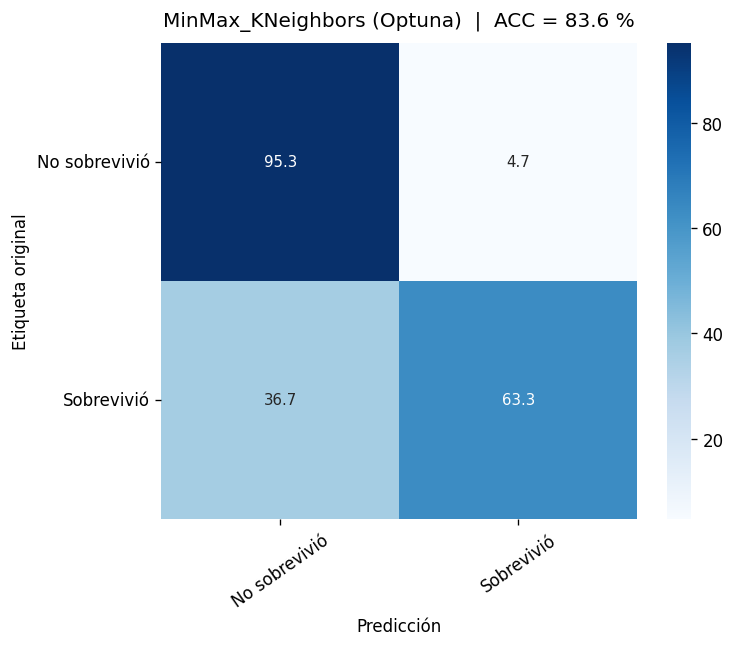

               precision    recall  f1-score   support

No sobrevivió      0.818     0.953     0.880       170
   Sobrevivió      0.886     0.633     0.738        98

     accuracy                          0.836       268
    macro avg      0.852     0.793     0.809       268
 weighted avg      0.843     0.836     0.828       268

Guardado: results/roc_MinMax_KNeighbors_optuna.png


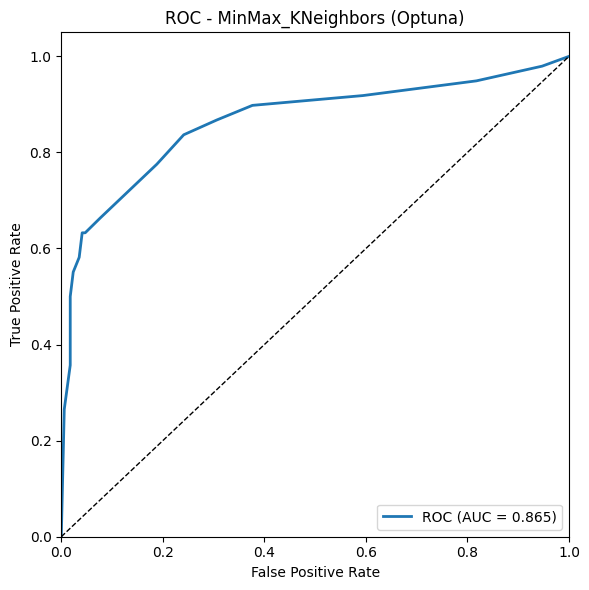

Evaluando MinMax_SGD (2/3)


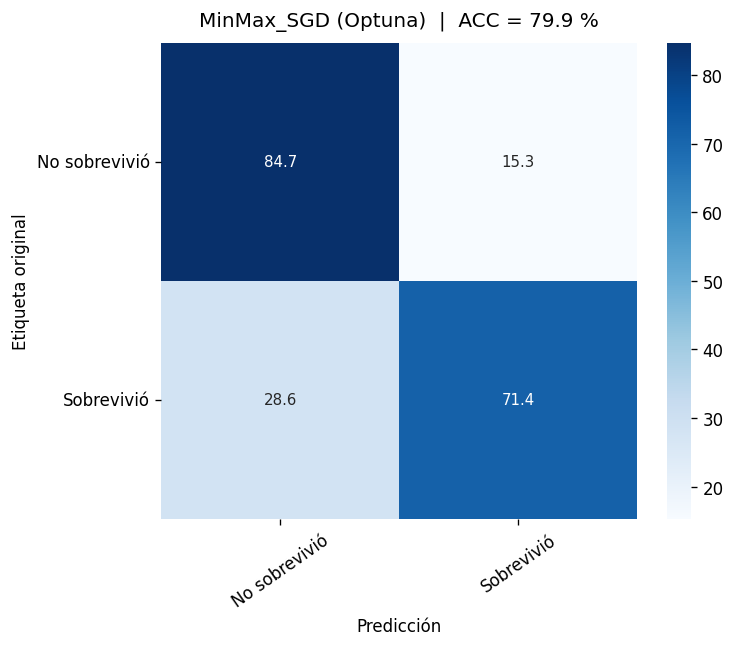

               precision    recall  f1-score   support

No sobrevivió      0.837     0.847     0.842       170
   Sobrevivió      0.729     0.714     0.722        98

     accuracy                          0.799       268
    macro avg      0.783     0.781     0.782       268
 weighted avg      0.798     0.799     0.798       268

Guardado: results/roc_MinMax_SGD_optuna.png


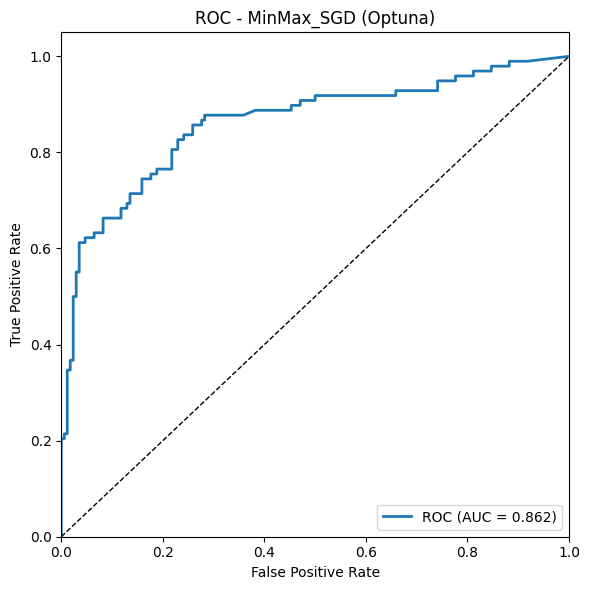

Evaluando MinMax_SVCrbf (3/3)


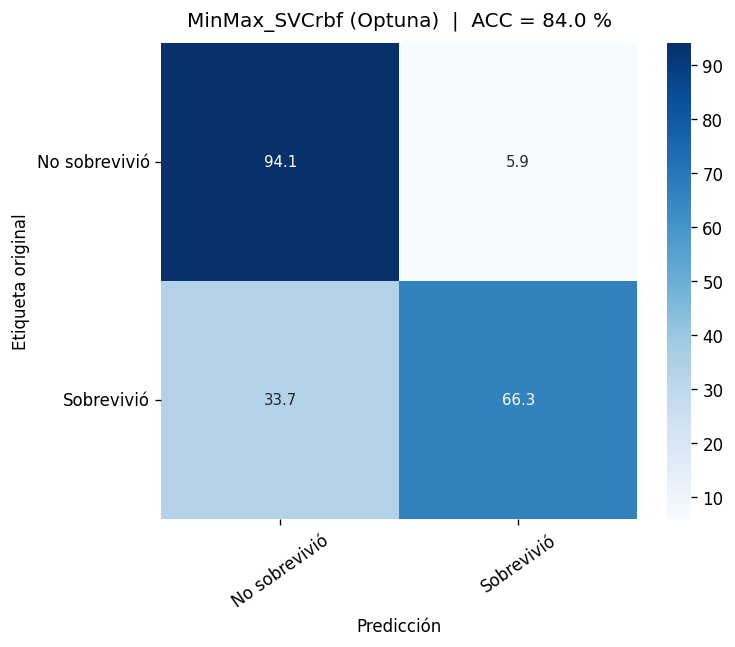

               precision    recall  f1-score   support

No sobrevivió      0.829     0.941     0.882       170
   Sobrevivió      0.867     0.663     0.751        98

     accuracy                          0.840       268
    macro avg      0.848     0.802     0.816       268
 weighted avg      0.843     0.840     0.834       268

Guardado: results/roc_MinMax_SVCrbf_optuna.png


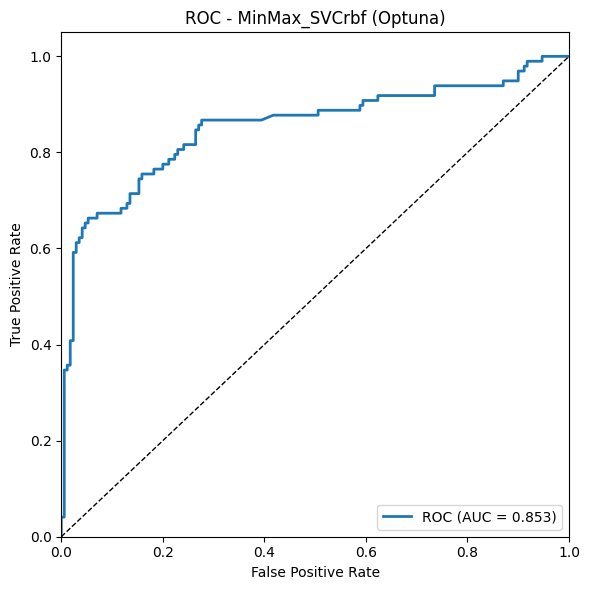

In [29]:
# Cargar los modelos de Optuna
recs = joblib.load('results/titanic_models_optuna.pkl')

class_names = ['No sobrevivió', 'Sobrevivió']

for i, rec in enumerate(recs):
    name = rec["name"]
    best_est = rec["estimator"]  # es un Pipeline ya entrenado
    print(f"Evaluando {name} ({i+1}/{len(recs)})")

    # Matriz + reporte (texto fuera de la figura si usas la versión 'simple' de cm_with_report)
    y_pred = best_est.predict(Xtest)
    acc, rep = cm_with_report(
        y_true=ytest,
        y_pred=y_pred,
        class_names=class_names,
        model_title=f'{name} (Optuna)',
        print_report=True,
        save_report_path=f'results/reporte_{name}_optuna.txt'
    )

    # ROC (si hay probas/decision_function)
    try:
        if hasattr(best_est, "predict_proba"):
            y_score = best_est.predict_proba(Xtest)[:, 1]
        else:
            y_score = best_est.decision_function(Xtest)
        _ = roc_auc_binary(ytest, y_score, title=f'ROC - {name} (Optuna)',
                           path_img='results', fig_id=f'roc_{name}_optuna')
    except Exception as e:
        print(f'No se pudo calcular ROC para {name}: {e}')
